# 샘플 데이터와 Stacking Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2021)

# 1. Data

1.1 Sample Data

In [2]:
from sklearn.datasets import make_classification

data, label = make_classification(
    n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=2021
)

In [3]:
data.shape, label.shape

((1000, 20), (1000,))

# 1.2 Data EDA

In [4]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

In [5]:
pca_data = pca.fit_transform(data)

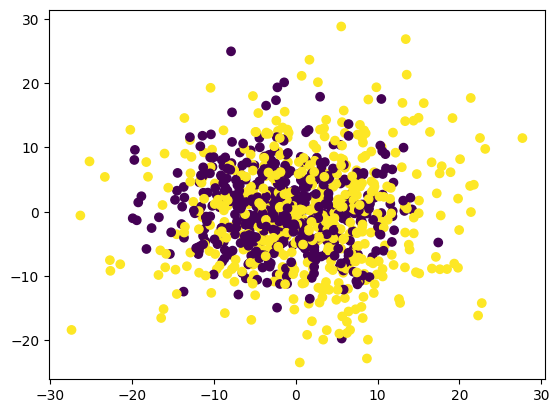

In [6]:
plt.scatter(pca_data[:,0], pca_data[:,1], c=label)

# 1.2 Data Split

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size = 0.7, random_state=2021
)

# 2. 개별 모델의 성능

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [17]:
models = {
    'lr': LogisticRegression(),
    'knn':KNeighborsClassifier(),
    'tree':DecisionTreeClassifier(),
    'svm':SVC(),
    'bayes':GaussianNB(),
}

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [19]:
names = []
results = []

for name, model in models.items():
  result= cross_val_score(model, train_data, train_label, cv=3, scoring="accuracy")
  names += [name]
  results += [result]

In [20]:
results

[array([0.79487179, 0.74678112, 0.81545064]),
 array([0.88888889, 0.90128755, 0.86266094]),
 array([0.73504274, 0.77682403, 0.76824034]),
 array([0.91025641, 0.89270386, 0.9055794 ]),
 array([0.75213675, 0.76824034, 0.77253219])]

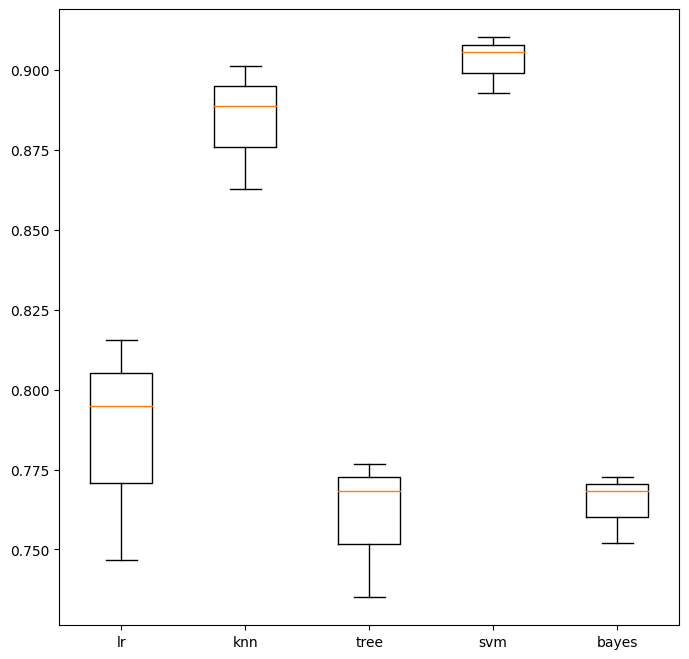

In [21]:
plt.figure(figsize=(8,8))
plt.boxplot(results, labels=names)
plt.show()
# SVM 성능이 가장 좋음

In [22]:
for name, model in models.items():
  model.fit(train_data, train_label)
  test_pred = model.predict(test_data)
  acc = accuracy_score(test_label, test_pred)
  print(f"Model {name} test accuracy is {acc:.4f}")

Model lr test accuracy is 0.7833
Model knn test accuracy is 0.8633
Model tree test accuracy is 0.7733
Model svm test accuracy is 0.9167
Model bayes test accuracy is 0.7800


# 3. Stacking

In [23]:
from sklearn.ensemble import StackingClassifier # stacking clssification
from sklearn.linear_model import LogisticRegression # meta model

In [27]:
models.keys()

dict_keys(['lr', 'knn', 'tree', 'svm', 'bayes'])

In [30]:
stacking = StackingClassifier(
    estimators=list(models.items()),
    final_estimator = LogisticRegression(),
    cv=3)

In [31]:
stacking_result = cross_val_score(stacking, train_data, train_label, cv=3, scoring="accuracy")

In [32]:
stacking_result

array([0.91025641, 0.90987124, 0.88841202])

In [34]:
all_result = []
all_result.extend(results)
all_result.append(stacking_result)

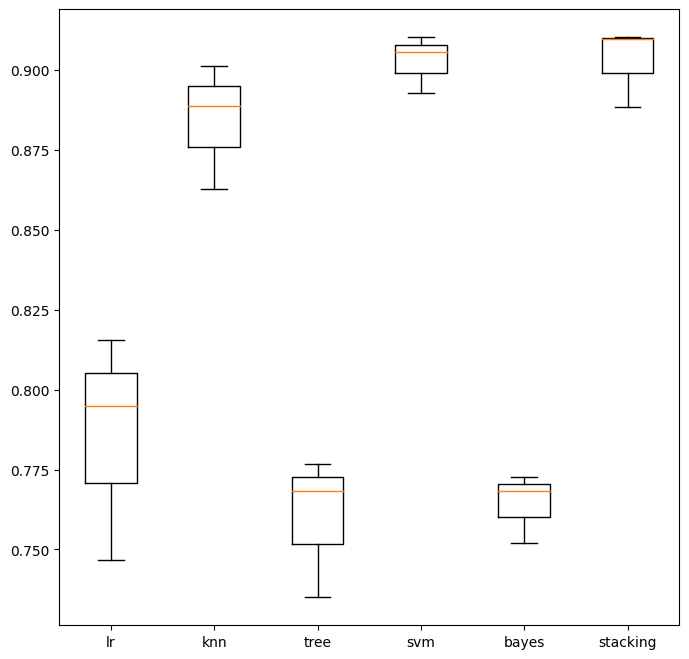

In [35]:
# svm과 비교해서 stacking 평균은 조금 낮지만, 분산법은 조금 큼

plt.figure(figsize=(8,8))
plt.boxplot(all_result, labels=names + ["stacking"])
plt.show()

In [36]:
# stacking에 전체 train data를 넣어서 성능 평가
for name, model in models.items():
  test_pred = model.predict(test_data)
  acc = accuracy_score(test_label, test_pred)
  print(f"Model {name} test accuracy is {acc:.4f}")

# stacking classfication을 통해서 각각 성능이 좋지 않은 모델이 성능이 좋아짐
stacking.fit(train_data, train_label)
stacking_pred = stacking.predict(test_data)
stacking_mae = accuracy_score(test_label, stacking_pred)
print(f"Model stacking test accuracy is {stacking_mae:.4f}")

Model lr test accuracy is 0.7833
Model knn test accuracy is 0.8633
Model tree test accuracy is 0.7733
Model svm test accuracy is 0.9167
Model bayes test accuracy is 0.7800
Model stacking test accuracy is 0.9267
